In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path

from os import getcwd
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import NMF
import scipy.cluster.hierarchy as hac 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.express as px

In [2]:
def zscore_bseline(input_mat):
    use_unit_z = np.zeros(input_mat.shape)
    for item in range(input_mat.shape[0]):
        use_unit = input_mat[item]
        unit_baseline = use_unit[0:1500]
        unit_baseline_mean = np.mean(unit_baseline)
        unit_baseline_std = np.std(unit_baseline)
        use_unit_z[item] = (use_unit - unit_baseline_mean)/unit_baseline_std
    return use_unit_z

In [3]:
all_unit_ave_activity = loadmat("processed_data/all_unit_ave_activity.mat")
cue_mat_1 = all_unit_ave_activity['cue_mat_1']
cue_mat_all = all_unit_ave_activity['cue_mat_all']
cue_mat_1_sem = all_unit_ave_activity['cue_mat_1_sem']
cue_mat_all_sem = all_unit_ave_activity['cue_mat_all_sem']

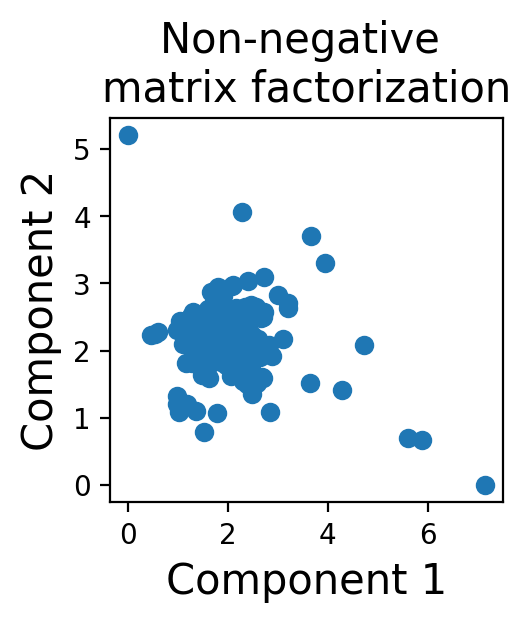

In [4]:
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(2.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

NMF_input = zscore_bseline(cue_mat_1)[:, 1500:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=2, init='random', random_state=0)
NMF_output = model.fit_transform(NMF_input)

axs.scatter(NMF_output[:, 0], NMF_output[:, 1])
#axs.legend(handles=handles)
axs.set_xlabel('Component 1', fontsize=15)
axs.set_ylabel('Component 2', fontsize=15)
axs.set_title('Non-negative \nmatrix factorization', fontsize=15)
plt.show();

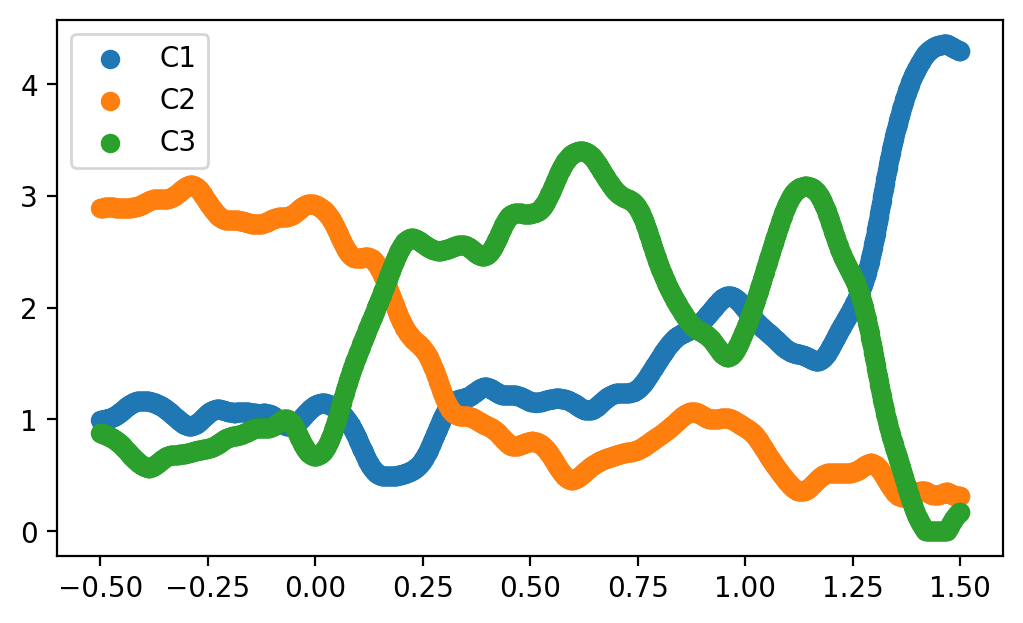

In [5]:
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=3, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-0.5, 1.5, 2000)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
#plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
#plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

plt.legend()
plt.show();

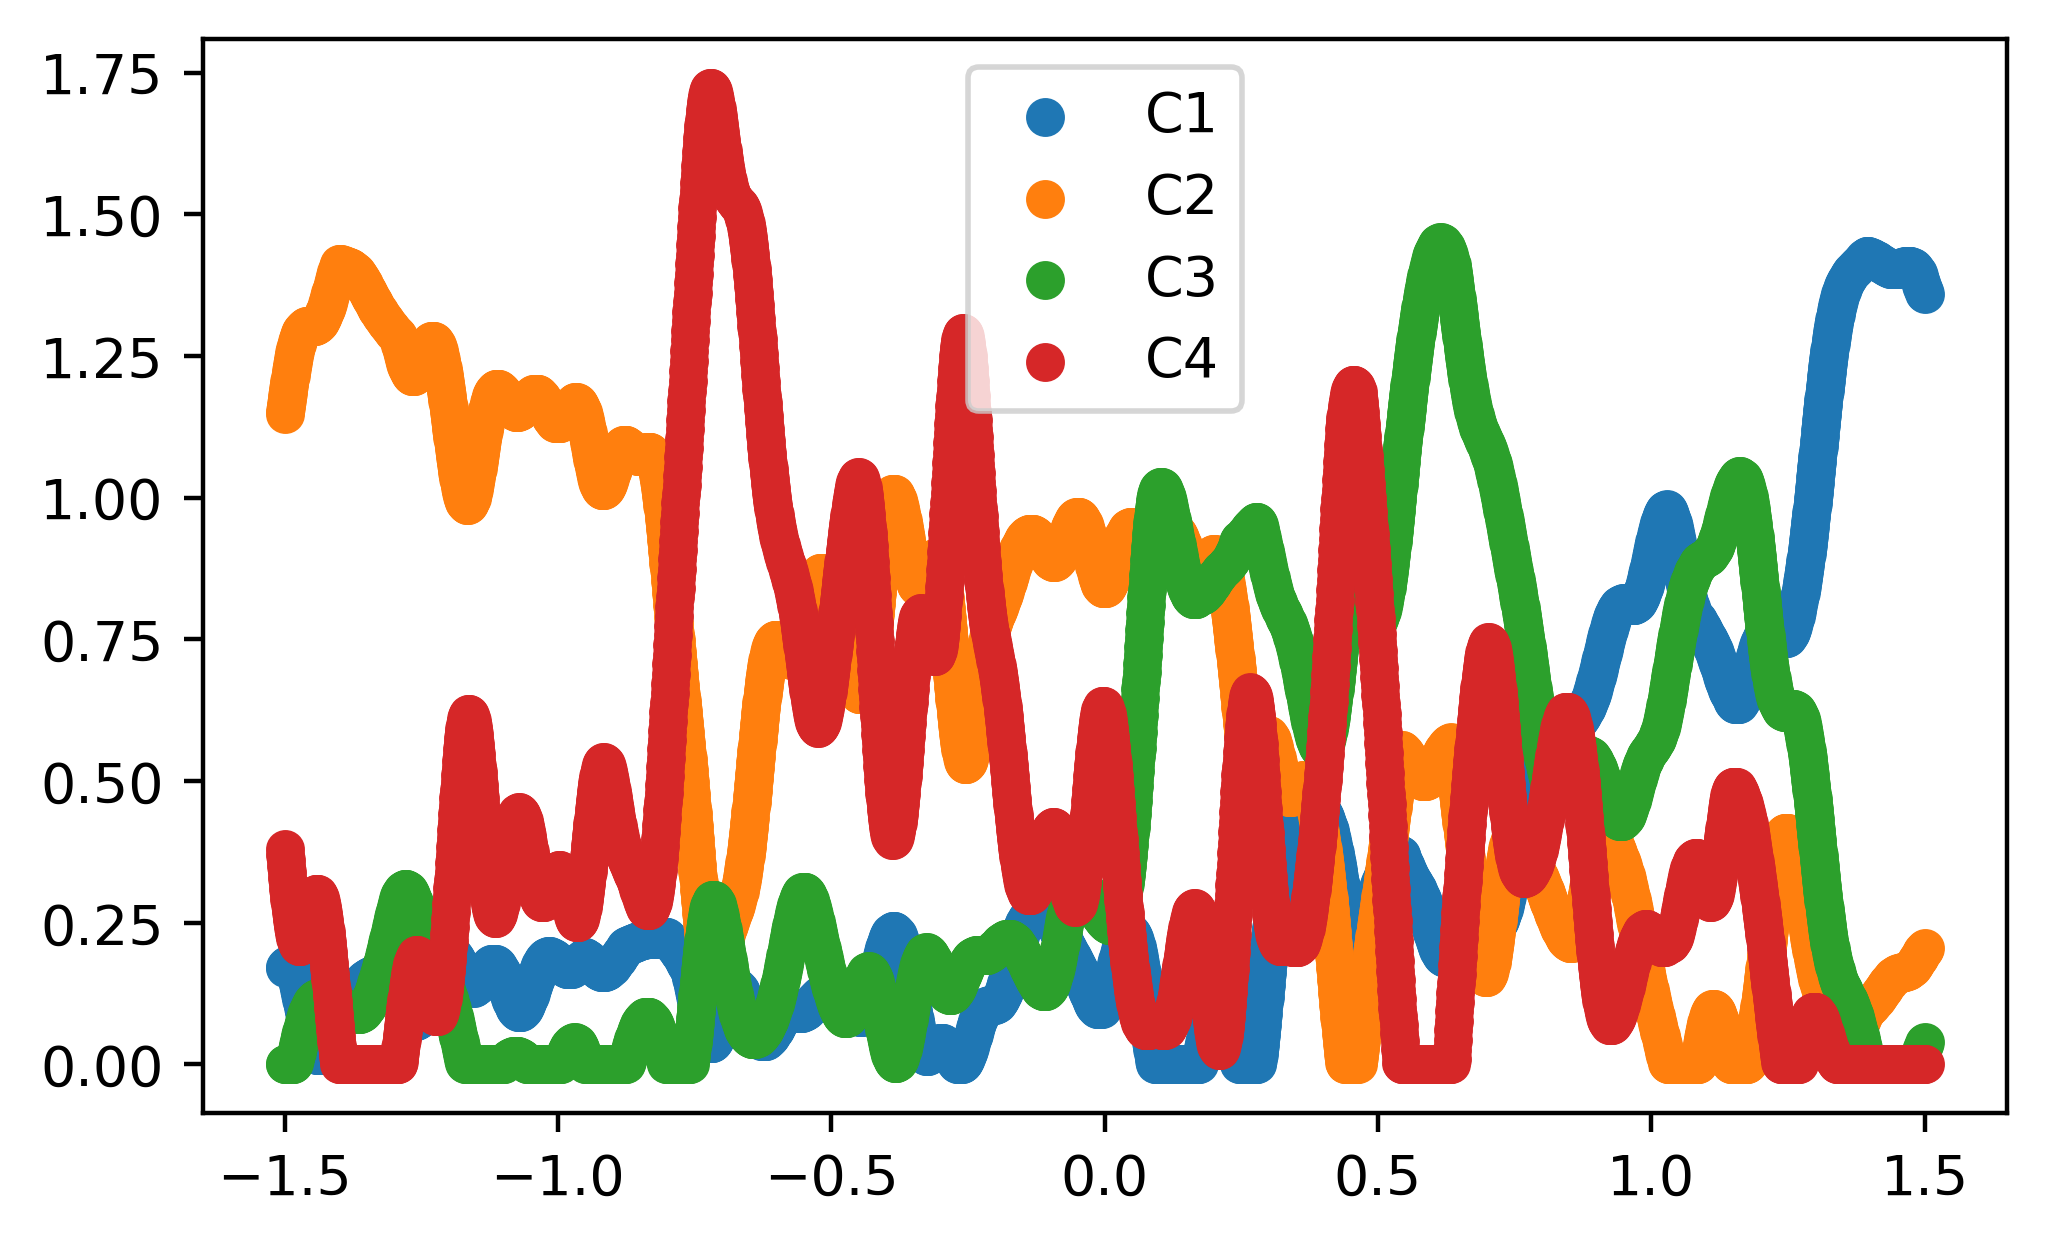

In [21]:
test = cue_mat_1[:, :3000]/cue_mat_1[:, :1500].mean(axis=1)[:,None]



NMF_input = test
#NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=4, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-1.5, 1.5, 3000)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
'''plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')
plt.scatter(x=x_lab, y=NMF_model.components_[5], label='C6')
plt.scatter(x=x_lab, y=NMF_model.components_[6], label='C7')
plt.scatter(x=x_lab, y=NMF_model.components_[7], label='C8')'''


plt.legend()
plt.show();

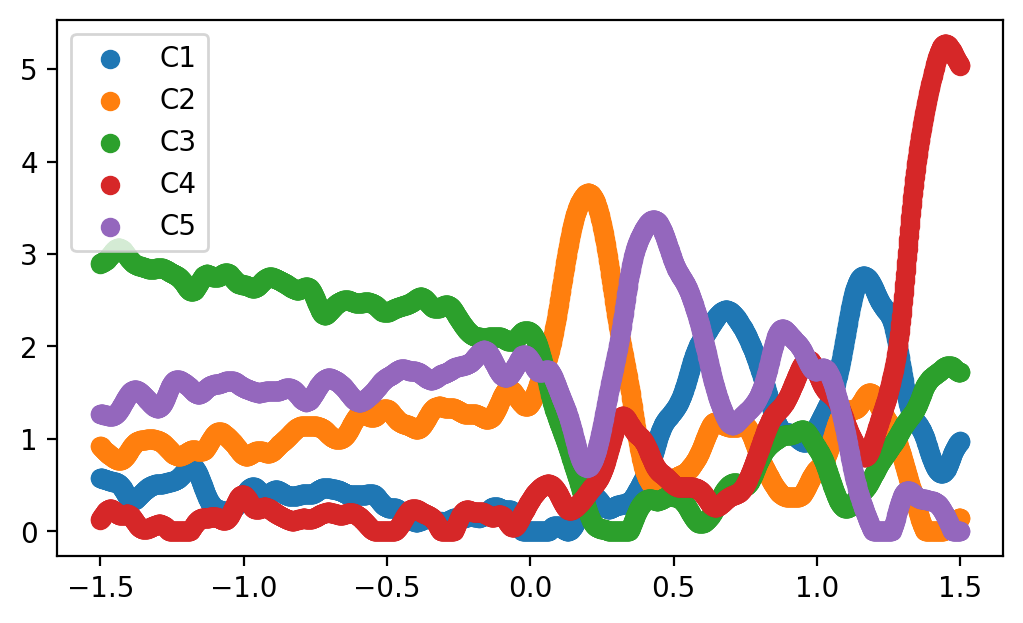

In [9]:
NMF_input = zscore_bseline(cue_mat_1)[:, :3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-1.5, 1.5, 3000)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

plt.legend()
plt.show();

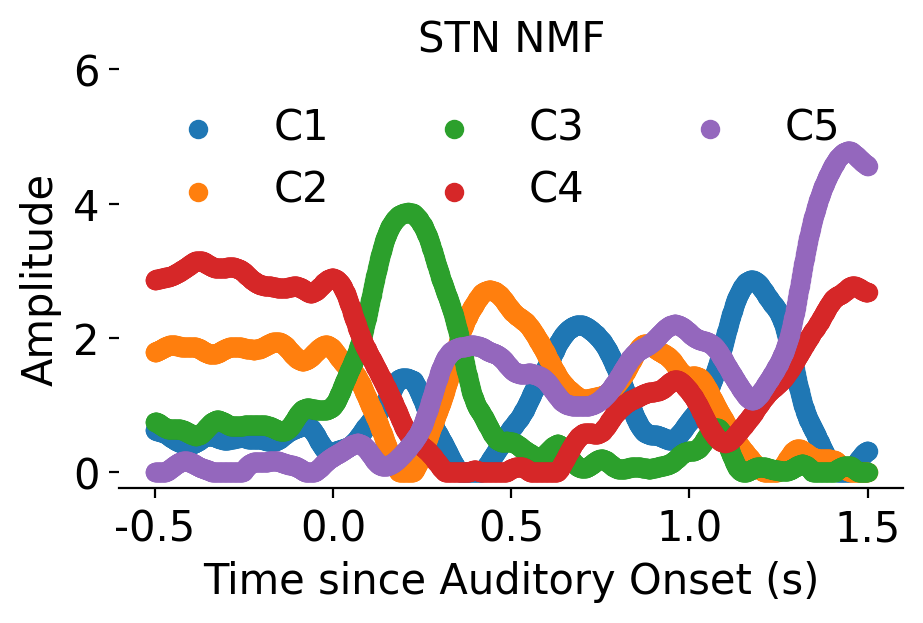

In [6]:
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-0.5, 1.5, 2000)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

axs.set_ylabel('Amplitude', fontsize=15)
axs.set_xlabel('Time since Auditory Onset (s)', fontsize=15)
legend = axs.legend(fontsize=15, frameon=False, ncol=3)
sns.despine(ax=axs, top=True, right=True, left=True, bottom=False)
axs.set_xticks(np.linspace(-0.5, 1.5, 5))
axs.set_xticklabels(np.linspace(-0.5, 1.5, 5), fontsize=15)
axs.set_yticks(np.linspace(0, 6, 4))
axs.set_yticklabels(np.linspace(0, 6, 4, dtype=int), fontsize=15)
axs.set_title('STN NMF', fontsize=15)

plt.show();

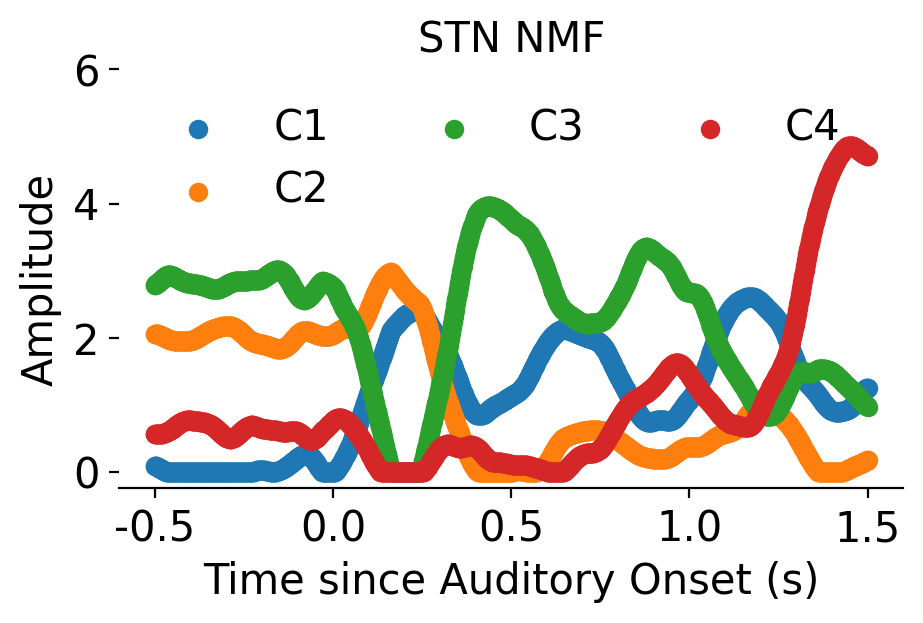

In [7]:
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=4, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-0.5, 1.5, 2000)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
#plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

axs.set_ylabel('Amplitude', fontsize=15)
axs.set_xlabel('Time since Auditory Onset (s)', fontsize=15)
legend = axs.legend(fontsize=15, frameon=False, ncol=3)
sns.despine(ax=axs, top=True, right=True, left=True, bottom=False)
axs.set_xticks(np.linspace(-0.5, 1.5, 5))
axs.set_xticklabels(np.linspace(-0.5, 1.5, 5), fontsize=15)
axs.set_yticks(np.linspace(0, 6, 4))
axs.set_yticklabels(np.linspace(0, 6, 4, dtype=int), fontsize=15)
axs.set_title('STN NMF', fontsize=15)

plt.show();

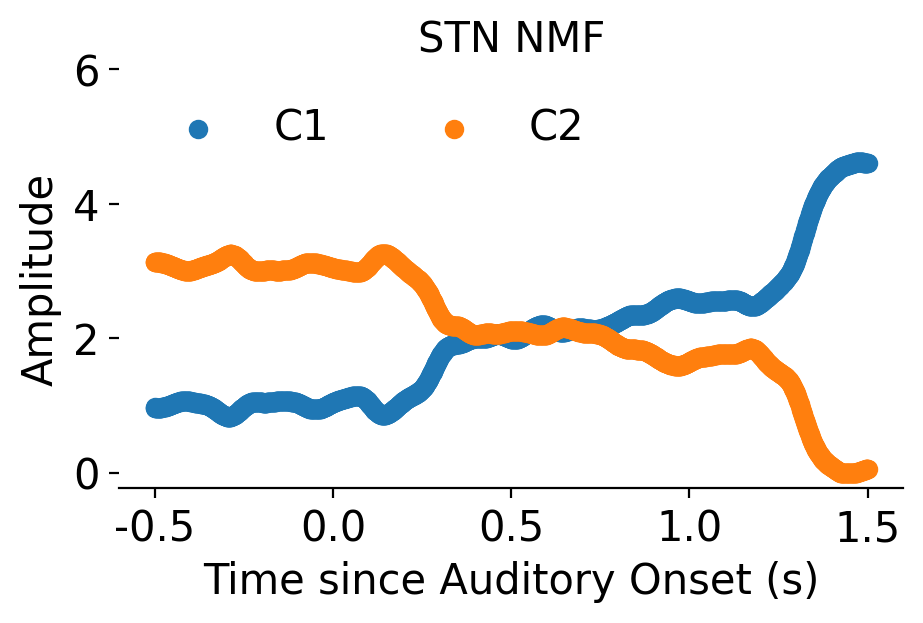

In [11]:
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=2, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-0.5, 1.5, 2000)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
#plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
#plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
#plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

axs.set_ylabel('Amplitude', fontsize=15)
axs.set_xlabel('Time since Auditory Onset (s)', fontsize=15)
legend = axs.legend(fontsize=15, frameon=False, ncol=3)
sns.despine(ax=axs, top=True, right=True, left=True, bottom=False)
axs.set_xticks(np.linspace(-0.5, 1.5, 5))
axs.set_xticklabels(np.linspace(-0.5, 1.5, 5), fontsize=15)
axs.set_yticks(np.linspace(0, 6, 4))
axs.set_yticklabels(np.linspace(0, 6, 4, dtype=int), fontsize=15)
axs.set_title('STN NMF', fontsize=15)

plt.show();

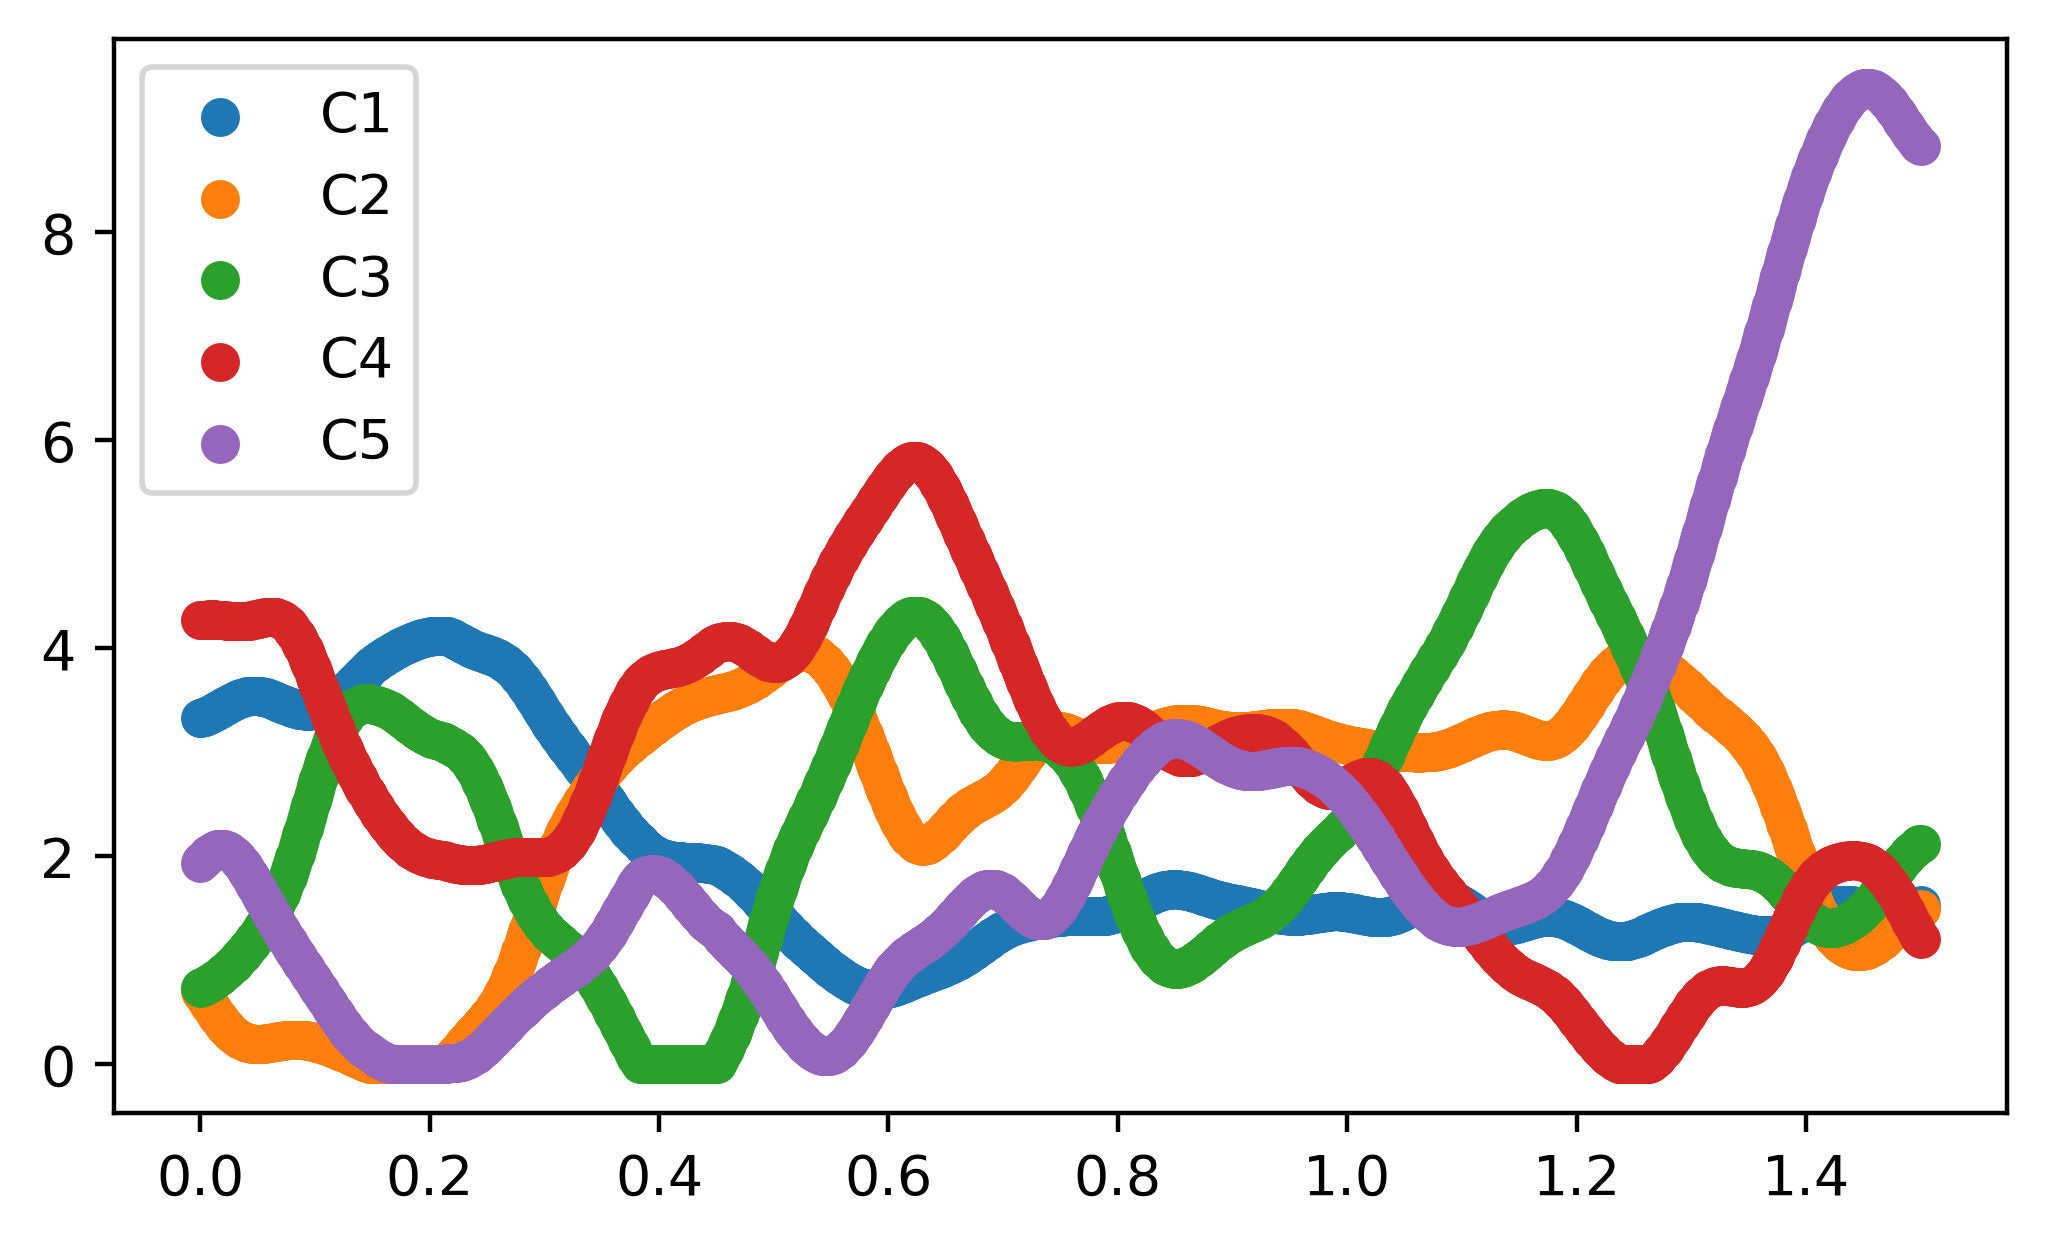

In [5]:
NMF_input = cue_mat_1[:, 1500:3000]
#NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(0, 1.5, 1500)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

plt.legend()
plt.show();

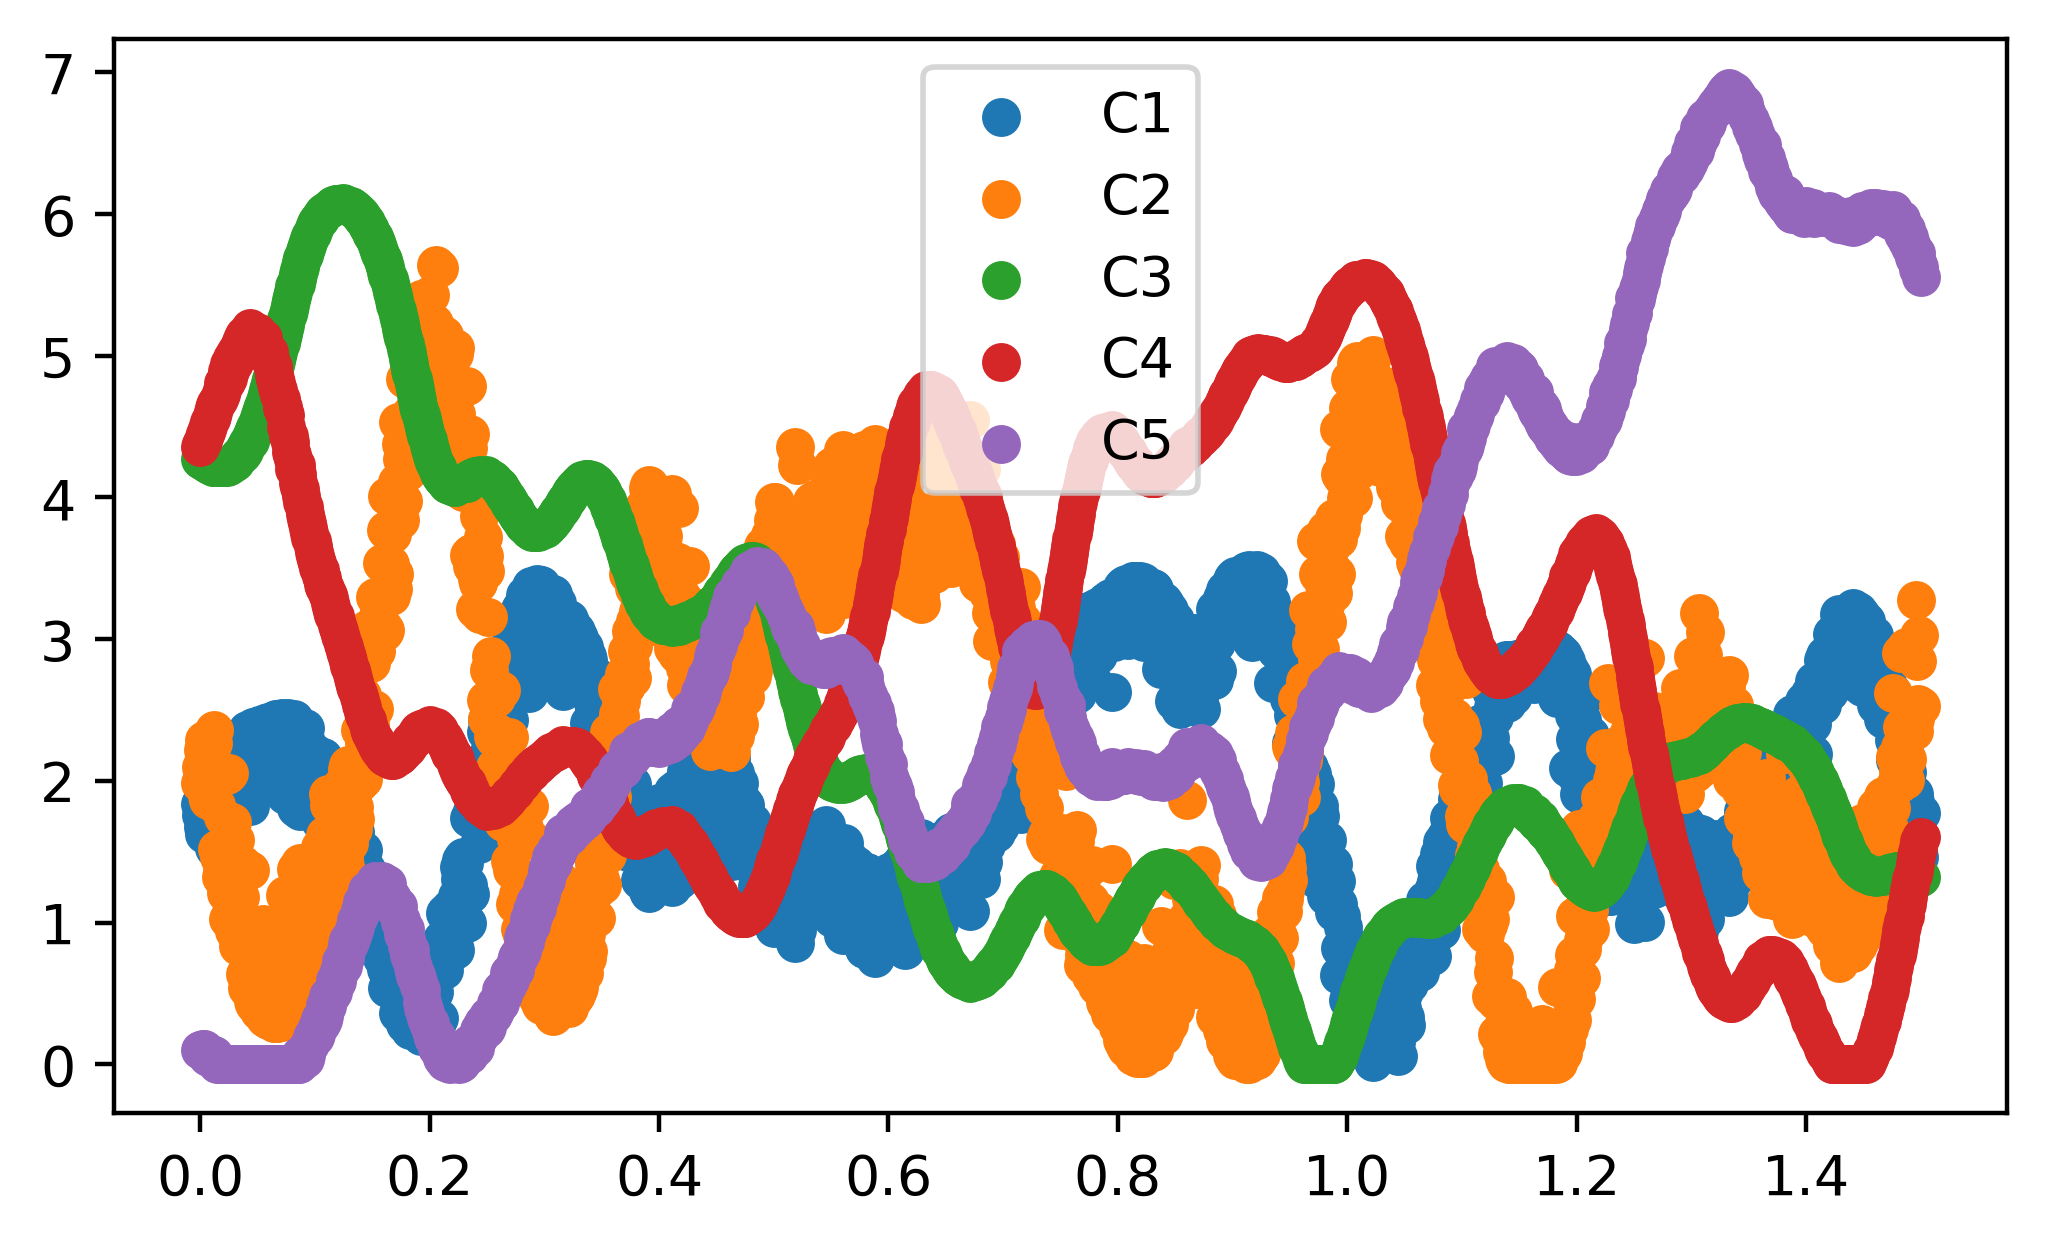

In [19]:
NMF_input = cue_mat_1[:, :1500]
#NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(0, 1.5, 1500)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

plt.legend()
plt.show();

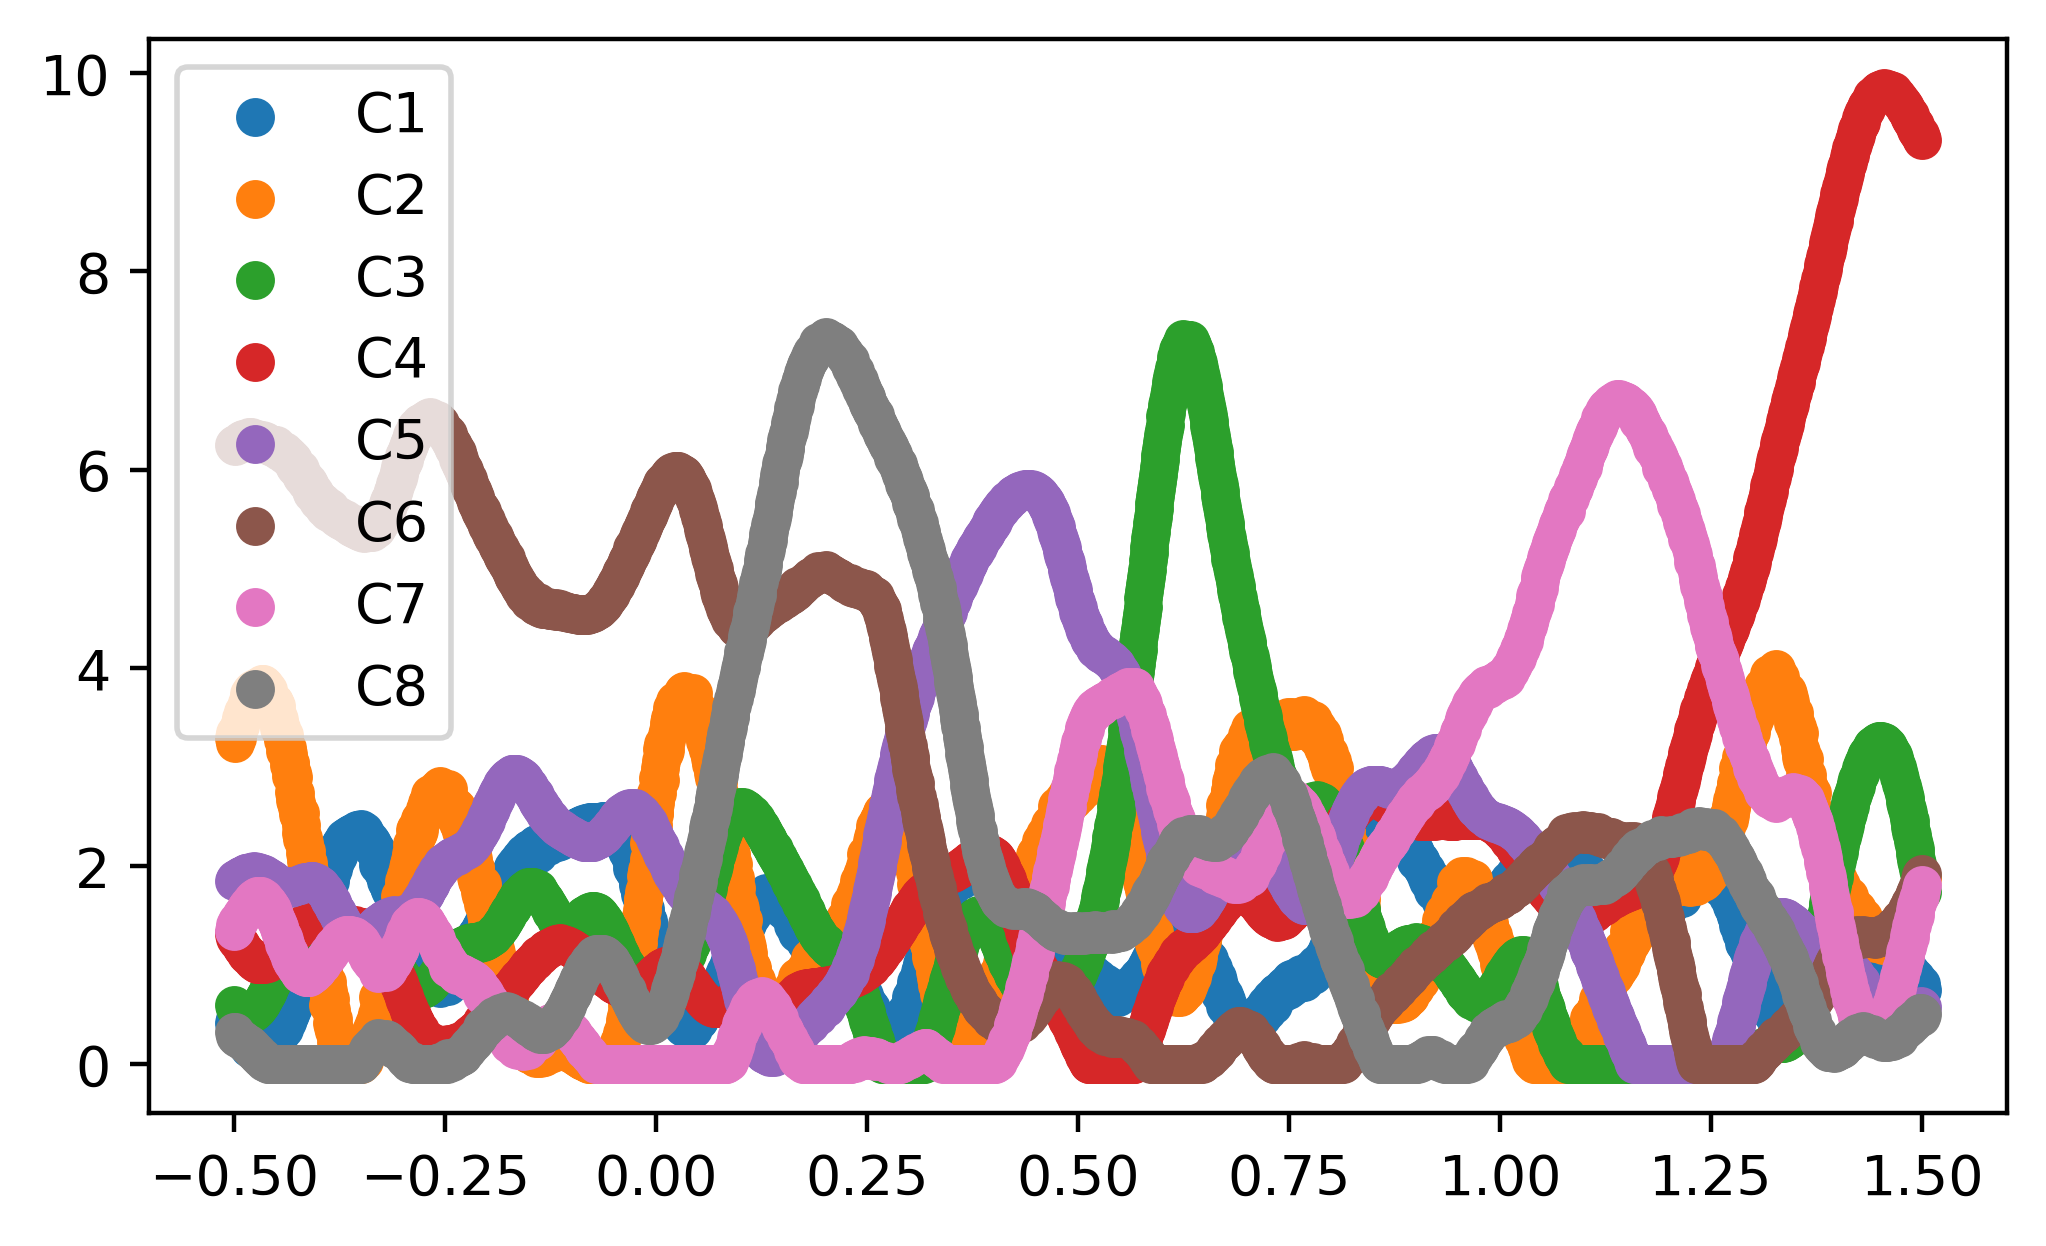

In [23]:
NMF_input = cue_mat_1[:, 1000:3000]
#NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=8, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-0.5, 1.5, 2000)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')
plt.scatter(x=x_lab, y=NMF_model.components_[5], label='C6')
plt.scatter(x=x_lab, y=NMF_model.components_[6], label='C7')
plt.scatter(x=x_lab, y=NMF_model.components_[7], label='C8')

plt.legend()
plt.show();

In [25]:
model.

{'alpha_H': 'same',
 'alpha_W': 0.0,
 'beta_loss': 'frobenius',
 'init': 'random',
 'l1_ratio': 0.0,
 'max_iter': 200,
 'n_components': 8,
 'random_state': 0,
 'shuffle': False,
 'solver': 'cd',
 'tol': 0.0001,
 'verbose': 0}